In [2]:
# 라이브러리 및 패키지 로드

import os
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# 데이터셋 다운로드

!wget https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -q captcha_images_v2.zip

--2022-04-26 07:45:24--  https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip [following]
--2022-04-26 07:45:24--  https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9075967 (8.7M) [application/zip]
Saving to: ‘captcha_images_v2.zip’

captcha_images_v2.z 100%[===================>]   8.66M  --.-KB/s    in 0.06s   

2022-04-26 07:45:25 (153 MB/s) - ‘captcha_images_v2.z

In [4]:
# 데이터셋 확인

img_list = glob('/content/captcha_images_v2/*.png')

len(img_list)

1040

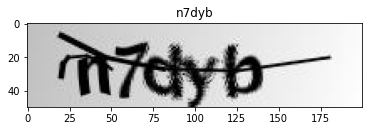

In [5]:
img = cv2.imread(img_list[5])

label = os.path.splitext(os.path.basename(img_list[5]))[0]

plt.title(label)
plt.imshow(img)

In [6]:
# 데이터 전처리

imgs = []
labels = []
max_length = 0

for img_path in img_list:
  imgs.append(img_path)

  label = os.path.splitext(os.path.basename(img_path))[0]
  labels.append(label)

  if len(label) > max_length:
    max_length = len(label)

print(len(imgs), len(labels), max_length)

1040 1040 5


In [7]:
''.join(labels)

'2356gpym7pwf684mfc35yx2d4n7dybm457d7pn5gnxxf874853b55d68n34n2n73f3bnyfygfwebd3b7bpwd78pfxxx2cnnfp76272m6f7gce68npd5cdcb35mfffde45xn7ennnbp3e2npg67m8px658xe7cgymc6we6x775wcewnmcg5dd3p67nw75w8m3wfwbgd4mpnnwyggd7m2ycn8nb267x75472nbcxnf8b8m23bpd7nn34fp5g24pew8n65n4w6mw4b2pwe2mg2gcfgpecd4wxf4p4865wme6b7yng6yp226mdd75b53ny45dn5df47e4p5ep3n6ge3p662bw6gnm3gw46877wp4d3c7y8gecm5np4mebcbx4d22mpmg55nm46nmmg2mef4npnm248yf347f858x4gycbgny6bc7nn8gd4mf22d5n55w5c6pwcnpgg3n44fybnf7bndnne7bmxpewye852w4y7ny5dpnn4wx7bb7bw8f3643geydmxp8gxxpf7nnnxnn6mgpg4bfn3bm6be3bpdfnx4mm3nnx4f7gc8n8cgng6egnbn4xce8df75cxm4fd8e2d66268g224f6w2b827gewfyxw4654dw3w56c34d8dcedw6mnbw5nff6ne525m6pemwpny4ec2wnpecm75bfmx8bbmgw3nyd38ex3fwff228nn464cyg5bbf74x377n6gdn26nndecc6fn84w46ep2nx38ef4mnydg8nwg625b4d7cb5dn4xfgxbnmy2x82fx2p4pde325fbe76n4bwmeex277e3nw7w6wnycgfp54g3dy64433me3ndnnb45de5n66wmpmpg6n7xyew6pf364x7yf626end3cd6p4ydd3gpm363mxnw4p4nm46xpmen3m6xpwebmgc2wdgm2c26f8576xxdx7e2y757gnxm3b5pmddgb7634y8ccccncw4g253dcdxwcwmy84ec674

In [8]:
# 라벨에 존재하는 단어 중복 제거 unique 기능

characters = set(''.join(labels))
characters

{'2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y'}

In [9]:
# 라벨 Encode

# characters를 만들어서 StringLookUp에게 던져주면, word Embedding처럼 각 data value들이 index로 표현될 수 있도록 도와주는 함수
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=0, mask_token=None
)

num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), num_oov_indices=0, mask_token=None, invert=True
)

print(labels[0])
encoded = char_to_num(tf.strings.unicode_split(labels[0], input_encoding='UTF-8'))
print(encoded)

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


2356g
tf.Tensor([12 11 18  9  2], shape=(5,), dtype=int64)


In [10]:
# encoded를 num_to_char에게 던져, data value 출력

tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')

'2356g'

In [11]:
# 훈련 데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.1, random_state=42)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

936 936
104 104


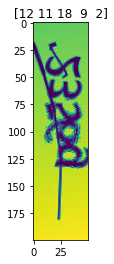

In [12]:
# 데이터 생성

img_width = 200
img_height = 50

def encode_single_sample(img_path, label):
  # 1. 이미지 불러와서
  img = tf.io.read_file(img_path)

  # 2. 디코딩 및 gray 스케일로 변환
  img = tf.io.decode_png(img, channels=1)

  # 3. 0 ~ 1 범위를 가지는 float32로 타입 변환
  img = tf.image.convert_image_dtype(img, tf.float32)

  # 4. 원하는 크기로 이미지 크기 조정
  img = tf.image.resize(img, [img_height, img_width])

  # 5. 이미지 조 이동
  # 이미지 너비에 해당하는 수치
  img = tf.transpose(img, perm=[1, 0, 2])

  # 6. 레이블의 문자를 숫자로 변환
  label = char_to_num(tf.strings.unicode_split(label, input_encoding='UTF-8'))

  # 7. image와 거기에 맞는 label 반환
  return {'image': img, 'label': label}

preview = encode_single_sample(imgs[0], labels[0])

plt.title(str(preview['label'].numpy()))
plt.imshow(preview['image'].numpy().squeeze())

In [13]:
batch_size = 32

# tf.data.Dataset를 생성하는 함수로 입력된 텐서로부터 slices를 생성
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# 입력된 데이터셋의 각 원소에 주어진 매개변수를 적용하여 새로운 데이터셋을 생성
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

print(train_dataset)
print(validation_dataset)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 200, 50, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>
<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 200, 50, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>


In [14]:
# 학습 모델

class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # 손실 값 계산
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_length = tf.cast(tf.shape(y_pred)[1], dtype='int64')
        label_length = tf.cast(tf.shape(y_true)[1], dtype='int64')

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        return y_pred


def build_model():
    # 인풋 Layer
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name='image', dtype='float32')
    labels = layers.Input(name='label', shape=(None,), dtype='float32')

    # 첫 번째 Conv2D Layer
    x = layers.Conv2D(
        32,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv1',
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)

    # 두 번째 Conv2D Layer
    x = layers.Conv2D(
        64,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv2',
    )(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)

    # 이후 RNN 모델에 출력 전달
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # 출력 layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation='softmax', name='dense2'
    )(x)

    # CTC 손실 계산하기 위해 Layer 추가
    output = CTCLayer(name='ctc_loss')(labels, x)

    # 모델 정의
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name='ocr_model_v1'
    )
    # 옵티마이저
    opt = keras.optimizers.Adam()

    # 모델 컴파일
    model.compile(optimizer=opt)
    return model


# 모델 로드 및 요약
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 50, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 100, 25, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 100, 25, 64)  18496       ['pool1[0][0]']       

In [15]:
# 모델 학습

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
30/30 [==============================] - 19s 86ms/step - loss: 24.7837 - val_loss: 16.4427
Epoch 2/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3552 - val_loss: 16.3526
Epoch 3/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3153 - val_loss: 16.3327
Epoch 4/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3220 - val_loss: 16.3378
Epoch 5/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3187 - val_loss: 16.3450
Epoch 6/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3188 - val_loss: 16.3439
Epoch 7/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3171 - val_loss: 16.3469
Epoch 8/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3088 - val_loss: 16.3544
Epoch 9/100
30/30 [==============================] - 1s 37ms/step - loss: 16.3053 - val_loss: 16.3500
Epoch 10/100
30/30 [==============================] - 1s 37ms/step - loss: 16.294

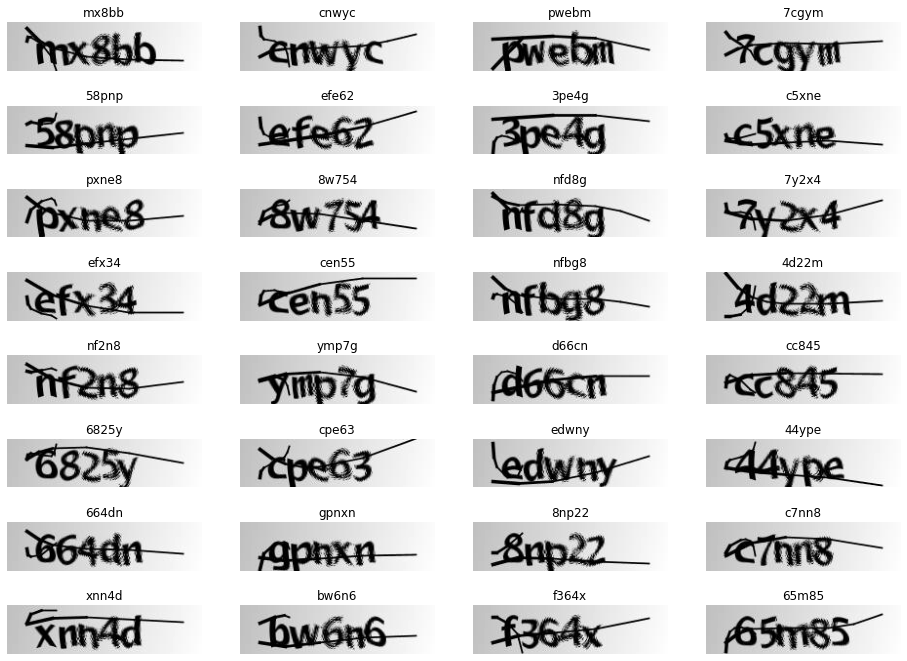

In [16]:
# 테스트 데이터 추론

prediction_model = keras.models.Model(
  model.get_layer(name='image').input, model.get_layer(name='dense2').output
)

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # 그리디 탐색 사용, 빔 탐색 방법도 사용해도 됨.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode('utf-8')
        output_text.append(res)
    return output_text

for batch in validation_dataset.take(1):
    batch_images = batch['image']

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    _, axes = plt.subplots(8, 4, figsize=(16, 12))

    for img, text, ax in zip(batch_images, pred_texts, axes.flatten()):
        img = img.numpy().squeeze()
        img = img.T

        ax.imshow(img, cmap='gray')
        ax.set_title(text)
        ax.set_axis_off()